# Data visualization - Wordcloud

### 1. Extracting data 
**listing 1.1. loading csv file**

In [80]:
import warnings
warnings.filterwarnings('ignore')###There is warnings for new python updates.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# read pizza data
pizza = pd.read_csv("C:/Users/User/OneDrive/Desktop/pizza&GDP.csv", encoding = 'unicode_escape')
pizza.head()

,Unnamed: 0,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,...,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,average_price,GDP
0,0.0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,...,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR,19,#ERROR!
1,1.0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,...,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR,18.95,#ERROR!
2,2.0,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,...,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55,Brentwood,12,278260
3,3.0,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,...,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55,Brentwood,13,278260
4,4.0,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,...,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55,Brentwood,13,278260


**Listing 1.2. Checking menus_name and average_price for duplicates**

In [74]:
pizza_dict = {'menus_name' : pizza.loc[:, "menus.name"],
              'average_price' : pizza.loc[:, "average_price"]} ### create target empty sets.
df_pizza = pd.DataFrame(pizza_dict) ### make pizza_dict becomes two dimentional array data.
summary = df_pizza.describe() ### use describe function to find out the duplicates of any menus name and average price.
print(summary) ###print the summary.

          menus_name average_price
count           3508          3509
unique          1597           382
top     Cheese Pizza   11.95351764
freq             136           562


**Listing 1.3. Examining the top-ranked words in the pizza file**

In [77]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer ### use TFIDF matrix to rank the frequencies of words.

def rank_words(text_list): ### define the rank euqation.
    vectorizer = TfidfVectorizer(stop_words='english') ### use TFIDF to detect English words.
    tfidf_matrix = vectorizer.fit_transform(text_list.values.astype('U')).toarray() ### vectorize the text list and make it becomes a matrix
    df = pd.DataFrame({'Words': vectorizer.get_feature_names(),
                       'Summed TFIDF': tfidf_matrix.sum(axis=0)}) ### compute TFIDF matrix and sum across the rows of the matrix.
    sorted_df = df.sort_values('Summed TFIDF', ascending=False) ### sort the summed TFIDF in decending way.
    return sorted_df  

### print the top-ranked name in menus
sorted_df_menus = rank_words(df_pizza['menus_name']) ### use the rank function which define previously to rank the menus_name.
print(sorted_df_menus[:5],'\n') ### print out the first five highest frequencies word base on summed TFIDF with the word index.
sorted_df_menus = sorted_df_menus.drop([640]) ### drop the useless word
print(sorted_df_menus[:5].to_string(index=False),'\n') ###return a sorted pandas table of top-ranked menu_name.
### print the top-ranked price in average
sorted_df_price = rank_words(df_pizza['average_price']) ### use the rank function which define previously to rank the average_price.
print(sorted_df_price[:5],'\n') ### print out the first five highest frequencies price base on summed TFIDF with the word index.
sorted_df_price = sorted_df_price.drop([76,71,70]) ### drop the extreme prices
print(sorted_df_price[:5].to_string(index=False),'\n') ###return a sorted pandas table of top-ranked average_price.

          Words  Summed TFIDF
640       pizza    589.814356
184      cheese    232.447419
198     chicken    145.215471
943       white    107.071616
495  margherita    101.637918 

     Words  Summed TFIDF
    cheese    232.447419
   chicken    145.215471
     white    107.071616
margherita    101.637918
 pepperoni     80.428122 

       Words  Summed TFIDF
3         11    519.494703
76        99    476.192594
71  95351764    420.612246
70        95    363.582969
6         12    199.912527 

Words  Summed TFIDF
   11    519.494703
   12    199.912527
   15    165.060979
   10    160.236856
   14    148.250282 



### 2. Wordcloud for the most popular pizza
**Listing 2.1. Vectorizing menu names**

In [123]:
v = TfidfVectorizer(stop_words='english') ### use TFIDF to detect English words.
tfidf_matrix = v.fit_transform(pizza_dict['menus_name'].values.astype('U')).toarray() ### vectorize the menu names and make it becomes a matrix
print(tfidf_matrix.shape) ### print the dimension of the matrix.

(3509, 967)


**Listing 2.2. Removing duplicates and vectorizing the menus**

In [124]:
total_menus = pizza_dict['menus_name'] ### create a list of menus_name
total_menus = set(total_menus) ### remove the duplicates
total_menus = list(total_menus) ### form a new list without the duplicates
total_menus = [item for item in total_menus if not(pd.isnull(item))==True] ### remove the null data

vectorizer = TfidfVectorizer(stop_words='english') ### define vectorizer using TfidfVectorize and only detect English words.
tfidf_matrix = vectorizer.fit_transform(total_menus) ### makes total_menus into matrix format.
num_rows, num_columns = tfidf_matrix.shape ### define rows and columns as num_rows and num_columns.
print(f"Our matrix has {num_rows} rows and {num_columns} columns") ### print out the results.

Our matrix has 1597 rows and 966 columns


**Listing 2.3. Dimensionally reducing the TFIDF matrix**

In [125]:
import numpy as np
from sklearn.decomposition import TruncatedSVD  ### use SVD modules to reduce TFIDF matrix dimensions.
from sklearn.preprocessing import normalize  ### normalize the data.
np.random.seed(0)  ### random seed.

def shrink_matrix(tfidf_matrix):
    svd_object = TruncatedSVD(n_components=100) ### shink the matrix to 100 dimensions with SVD.
    shrunk_matrix = svd_object.fit_transform(tfidf_matrix) ### get the shrunk matrix by svd tranksform function.
    return normalize(shrunk_matrix) ### normalize the new matrix.
 
shrunk_norm_matrix = shrink_matrix(tfidf_matrix)  ### get the nomral shrunk matrix.
print(shrunk_norm_matrix.shape) ### print the dimenstion of the nomral shrunk matrix.

(1597, 100)


**Listing 2.4. Plotting an elbow curve using Mini Batch K-Means**

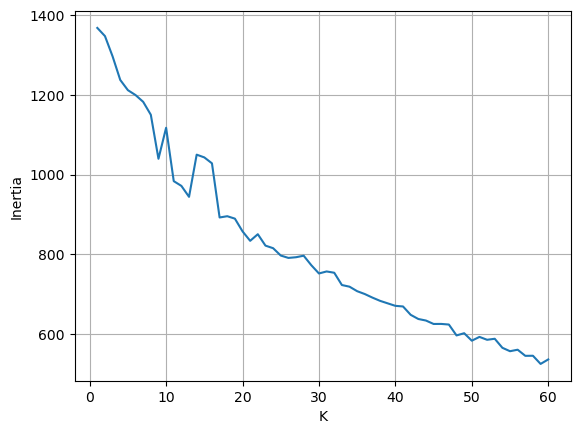

In [37]:
np.random.seed(0)  ### use the random seed.
from sklearn.cluster import MiniBatchKMeans  ### use Kmeans culster model.
def generate_elbow_plot(matrix):
    k_values = range(1, 61) ### use K between 1 and 61.
    inertia_values = [MiniBatchKMeans(k).fit(matrix).inertia_
                      for k in k_values]  ### get the inertia values by MiniBatchKMeans.fit.inertia function.
    plt.plot(k_values, inertia_values)
    plt.xlabel('K')
    plt.ylabel('Inertia') ### add x-label and y-label.
    plt.grid(True) ### add grid to the plot.
    plt.show()

generate_elbow_plot(shrunk_norm_matrix) ### generate elbow plot to get the optimal K values.

**Listing 2.5. Clustering pizza names into 9 clusters**

In [126]:
np.random.seed(0) ### use the random seed.
from sklearn.cluster import KMeans ### use Kmeans to group the data.

def compute_cluster_groups(shrunk_norm_matrix, k=9): ### K values is 9, it will present a list of panda table where 
    cluster_model = KMeans(n_clusters=k)      ### each table present a cluster and total clusters is 9.
    clusters = cluster_model.fit_predict(shrunk_norm_matrix) ### use KMeans pridict funtion to get the clusters.
    df = pd.DataFrame({'Index': range(clusters.size), 'Cluster': clusters,
                       'Bullet': total_menus}) ### tracks each clustered pizza name's index in clusters, clusters ID and text.
    return [df_cluster for  _, df_cluster in df.groupby('Cluster')] ### return the result for each clusters.

cluster_groups = compute_cluster_groups(shrunk_norm_matrix) ### apply the cluster rule into the matrix.

**Listing 2.6. Visualizing the first cluster**

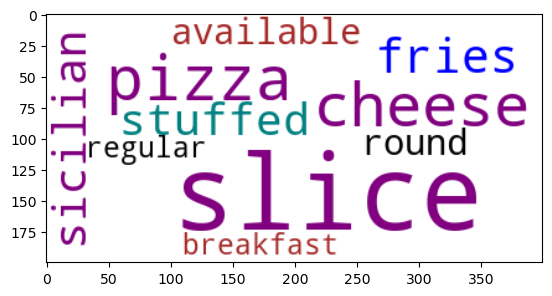

In [127]:
from wordcloud import WordCloud ### WordCloud can visualize the data and prensents the text data.
np.random.seed(0)

def cluster_to_image(df_cluster, max_words=10, tfidf_matrix=tfidf_matrix, ### takes as input a df_cluster table.
                     vectorizer=vectorizer):  ### set only 10 words to appear in the image.
    indices = df_cluster.Index.values ### define indices as cluster index value.
    summed_tfidf = np.asarray(tfidf_matrix[indices].sum(axis=0))[0] ### define summed_tifdf as sum of the tfidf matrix indices.
    data = {'Word': vectorizer.get_feature_names(),'Summed TFIDF': summed_tfidf} ### use summed TFIDF to count the frequency of each words.
    df_ranked_words = pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False) ### rank the summed TFIDF in decending way.
    words_to_score = {word: score
                     for word, score in df_ranked_words[:max_words].values
                     if score != 0}
    cloud_generator = WordCloud(background_color='white', ### define the image background as white.
                                color_func=_color_func, ### use _color_function as color function.
                                random_state=1)
    wordcloud_image = cloud_generator.fit_words(words_to_score)
    return wordcloud_image ### generate the image by WordColoud function.

def _color_func(*args, **kwargs):
    return np.random.choice(['black', 'blue', 'teal', 'purple', 'brown']) ### define specific five colors for _color_function.

wordcloud_image = cluster_to_image(cluster_groups[0]) ### show the first cluster image.
plt.imshow(wordcloud_image, interpolation="bilinear") ### define the word weights as bilinear formula.
plt.show() ### show the graph.

**Listing 2.7. Printing sample pizza names from Cluster 0**

In [129]:
np.random.seed(1) ### use random seed(1).
def print_cluster_sample(cluster_id):
    df_cluster = cluster_groups[cluster_id]
    for pizza in np.random.choice(df_cluster.Bullet.values, 5, 
                                   replace=False):
        print(pizza)  ### print out 5 pizza names from cluster group(id).

print_cluster_sample(0) ### print the first cluster menu name.

Stuffed Pizza Slice
Pizza By The Slice (plain Cheese)
Sicilian Slice of Pizza
Pizza Slice
Regular Slice of Pizza


**Listing 2.8. Visualizing all 9 clusters**

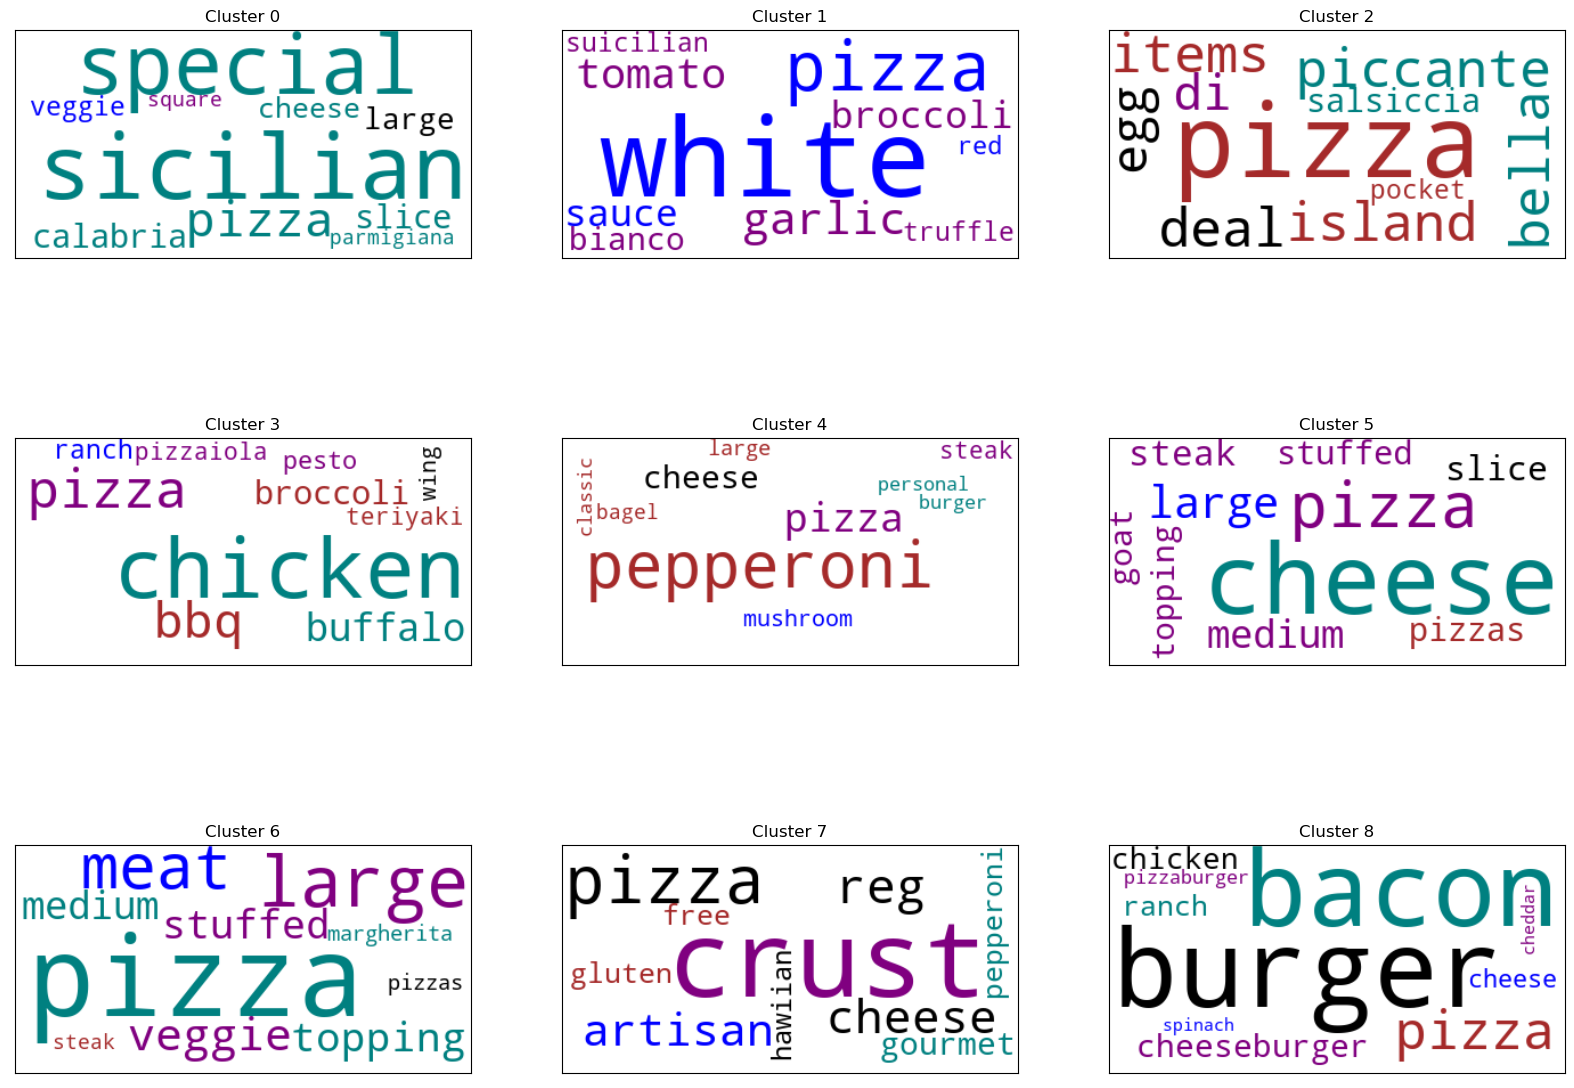

In [111]:
def plot_wordcloud_grid(cluster_groups, num_rows=3, num_columns=3, ### clusters are plotted in a 3 x 3 grid.
                        **kwargs): ### **kwargs can help to modify both vectorizer and tfidf_matrix.
    figure, axes = plt.subplots(num_rows, num_columns, figsize=(20, 15)) ### define the figure size.
    cluster_groups_copy = cluster_groups[:]
    for r in range(num_rows):
        for c in range(num_columns):
            if not cluster_groups_copy: 
                break  ### if r and c are out of range, stop the for loop.
                
            df_cluster = cluster_groups_copy.pop(0) ### remove the first element of the list, then it only exist the copy cluster group.
            wordcloud_image = cluster_to_image(df_cluster, **kwargs) ### use the define cluster and **kwargs for the image.
            ax = axes[r][c] ### define the x and y as row and column.
            ax.imshow(wordcloud_image,
            interpolation="bilinear")  ### use ax.imshow to display the cluster.  
            ax.set_title(f"Cluster {df_cluster.Cluster.iloc[0]}") ### make a title.
            ax.set_xticks([])
            ax.set_yticks([]) ### add empty word to the x-label and y-label.

cluster_groups = compute_cluster_groups(shrunk_norm_matrix)            
plot_wordcloud_grid(cluster_groups)
plt.show() ### plot the grid.

**Listing 2.9. Printing sample pizza names from the clusters with the three top-ranked words in listing 1.3.**

In [112]:
np.random.seed(1)
print_cluster_sample(1) ###print the pizza names of cluster 1.
print("")
np.random.seed(1)
print_cluster_sample(3) ###print the pizza names of cluster 3.
print("")
np.random.seed(1)
print_cluster_sample(5) ###print the pizza names of cluster 5.

Primo Alfredo White Pizza
White Pizza (medium)
Manhattan White Pizza
Margherita Pizza (white)
White Pesto Pizza

Parmesan Chicken Pizza
Maui Chicken Pizza
Chicken Pizza
Chicken Supreme Pizza
Chicken Parm Pizza

Cheese Party Pizza
Adult Cheese Pizza
Customer Appreciation Large Cheese Pizza
Chili Cheese Fries Pizza
Small Cheese Pizza


### 3. Wordcloud for the most prevalent average price for pizza
**Listing 3.1. Vectorizing average price**

In [148]:
v = TfidfVectorizer(stop_words='english') ### use TFIDF to detect English words.
tfidf_matrix = v.fit_transform(pizza_dict['average_price'].values.astype('U')).toarray() ### vectorize the text list and make it becomes a matrix
print(tfidf_matrix.shape) ### print the dimension of the matrix.

(3509, 77)


**Listing 3.2. Removing duplicates and vectorizing the average price**

In [149]:
total_prices = pizza.loc[:, "average_price"] ### create a list of average_price
total_prices = set(total_prices) ### remove the duplicates
total_prices = list(total_prices) ### form a new list without the duplicates
total_prices = [item for item in total_prices if not(pd.isnull(item))==True] ### remove the null data

vectorizer = TfidfVectorizer(stop_words='english') ### define vectorizer using TfidfVectorize and only detect English words.
tfidf_matrix = vectorizer.fit_transform(total_prices) ### makes total_prices into matrix format.
num_rows, num_columns = tfidf_matrix.shape ### define rows and columns as num_rows and num_columns.
print(f"Our matrix has {num_rows} rows and {num_columns} columns") ###print out the results.

Our matrix has 382 rows and 77 columns


**Listing 3.3. Dimensionally reducing the TFIDF matrix**

In [150]:
import numpy as np
from sklearn.decomposition import TruncatedSVD  ### use SVD modules to reduce TFIDF matrix dimensions.
from sklearn.preprocessing import normalize  ### normalize the data.
np.random.seed(0)  ### random seed.

def shrink_matrix(tfidf_matrix):
    svd_object = TruncatedSVD(n_components=50) ### shink the matrix to 50 dimensions with SVD.
    shrunk_matrix = svd_object.fit_transform(tfidf_matrix) ### get the shrunk matrix by svd tranksform function.
    return normalize(shrunk_matrix) ### normalize the new matrix.
 
shrunk_norm_matrix = shrink_matrix(tfidf_matrix)  ### get the nomral shrunk matrix.
print(shrunk_norm_matrix.shape) ### print the dimenstion of the nomral shrunk matrix.

(382, 50)


**Listing 3.4. Plotting an elbow curve using Mini Batch K-Means**

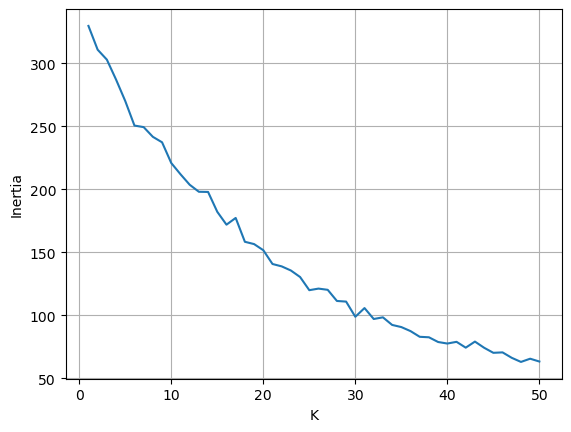

In [62]:
np.random.seed(0)  ### use the random seed.
from sklearn.cluster import MiniBatchKMeans  ### use Kmeans culster model.
def generate_elbow_plot(matrix):
    k_values = range(1, 51) ### use K between 1 and 51.
    inertia_values = [MiniBatchKMeans(k).fit(matrix).inertia_
                      for k in k_values]  ### get the inertia values by MiniBatchKMeans.fit.inertia function.
    plt.plot(k_values, inertia_values)
    plt.xlabel('K')
    plt.ylabel('Inertia') ### add x-label and y-label.
    plt.grid(True) ### add grid to the plot.
    plt.show()

generate_elbow_plot(shrunk_norm_matrix) ### generate elbow plot to get the optimal K values.

**Listing 3.5. Clustering average prices into 14 clusters**

In [151]:
np.random.seed(0) ### use the random seed.
from sklearn.cluster import KMeans ### use Kmeans to group the data.

def compute_cluster_groups(shrunk_norm_matrix, k=14): ### K values is 15, it will present a list of panda table where 
    cluster_model = KMeans(n_clusters=k)      ### each table present a cluster and total clusters is 15.
    clusters = cluster_model.fit_predict(shrunk_norm_matrix) ###use KMeans pridict funtion to get the clusters.
    df = pd.DataFrame({'Index': range(clusters.size), 'Cluster': clusters,
                       'Bullet': total_prices}) ### tracks each clustered average price's index in clusters, clusters ID and text.
    return [df_cluster for  _, df_cluster in df.groupby('Cluster')] ###return the result for each clusters.

cluster_groups = compute_cluster_groups(shrunk_norm_matrix) ###apply the cluster rule into the matrix.

**Listing 3.6. Visualizing the first cluster**

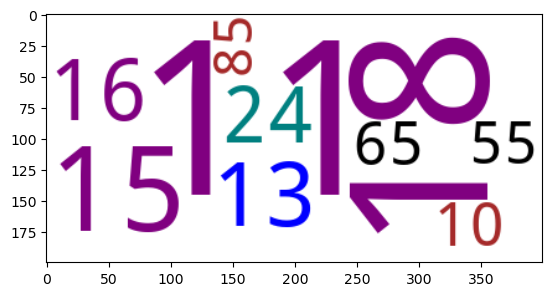

In [152]:
from wordcloud import WordCloud ###WordCloud can visualize the data and prensents the text data.
np.random.seed(0)

def cluster_to_image(df_cluster, max_words=10, tfidf_matrix=tfidf_matrix,###takes as input a df_cluster table.
                     vectorizer=vectorizer):  ### set only 10 words to appear in the image.
    indices = df_cluster.Index.values ### define indices as cluster index value.
    summed_tfidf = np.asarray(tfidf_matrix[indices].sum(axis=0))[0] ### define summed_tifdf as sum of the tfidf matrix indices.
    data = {'Word': vectorizer.get_feature_names(),'Summed TFIDF': summed_tfidf} ### use summed TFIDF to count the frequency of each words.
    df_ranked_words = pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False) ### rank the summed TFIDF in decending way.
    words_to_score = {word: score
                     for word, score in df_ranked_words[:max_words].values
                     if score != 0}
    cloud_generator = WordCloud(background_color='white', ### define the image background as white.
                                color_func=_color_func, ### use _color_function as color function.
                                random_state=1)
    wordcloud_image = cloud_generator.fit_words(words_to_score)
    return wordcloud_image ### generate the image by WordColoud function.

def _color_func(*args, **kwargs):
    return np.random.choice(['black', 'blue', 'teal', 'purple', 'brown']) ### define specific five colors for _color_function.

wordcloud_image = cluster_to_image(cluster_groups[0]) ### show the first cluster image.
plt.imshow(wordcloud_image, interpolation="bilinear") ### define the word weights as bilinear formula.
plt.show() ### show the graph.

**Listing 3.7. Printing sample average prices from Cluster 0**

In [153]:
np.random.seed(1) ### use random seed(1).
def print_cluster_sample(cluster_id):
    df_cluster = cluster_groups[cluster_id]
    for prices in np.random.choice(df_cluster.Bullet.values, 5, 
                                   replace=False):
        print(prices)  ### print out 5 average prices from cluster group(id).

print_cluster_sample(0) ### print the first cluster bullet points.

23
10.89
11.96
11.1
11.3


**Listing 3.8. Visualizing all 14 clusters**

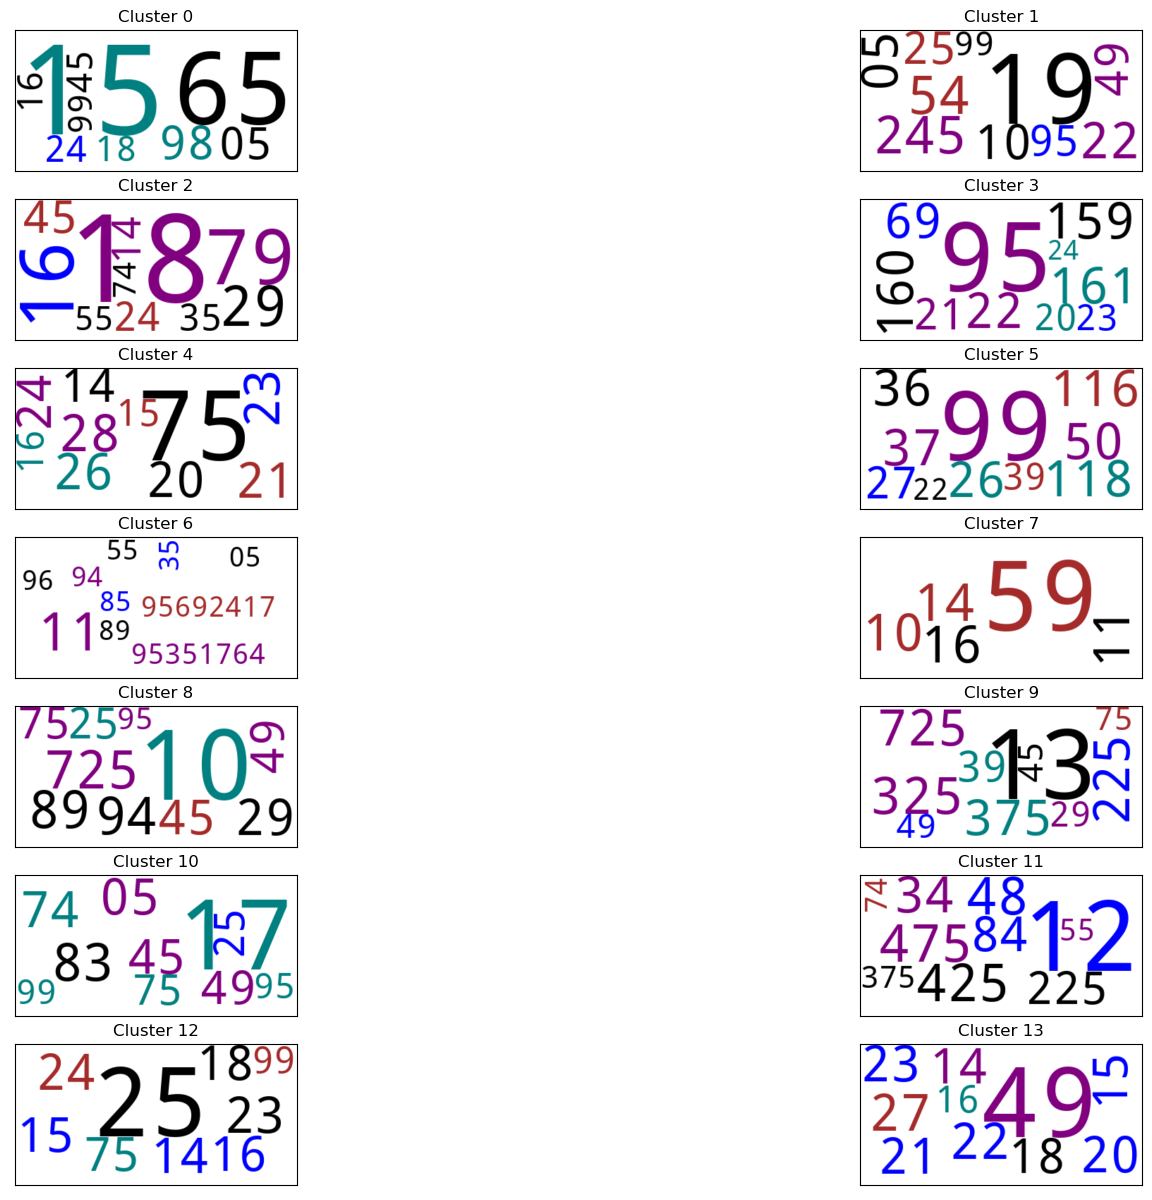

In [156]:
def plot_wordcloud_grid(cluster_groups, num_rows=7, num_columns=2, ### clusters are plotted in a 5 x 3 grid.
                        **kwargs): ### **kwargs can help to modify both vectorizer and tfidf_matrix.
    figure, axes = plt.subplots(num_rows, num_columns, figsize=(20, 15)) ### define the figure size.
    cluster_groups_copy = cluster_groups[:]
    for r in range(num_rows):
        for c in range(num_columns):
            if not cluster_groups_copy: 
                break  ### if r and c are out of range, stop the for loop.
                
            df_cluster = cluster_groups_copy.pop(0) ### remove the first element of the list, then it only exist the copy cluster group.
            wordcloud_image = cluster_to_image(df_cluster, **kwargs) ### use the define cluster and **kwargs for the image.
            ax = axes[r][c] ### define the x and y as row and column.
            ax.imshow(wordcloud_image,
            interpolation="bilinear")  ### use ax.imshow to display the cluster.  
            ax.set_title(f"Cluster {df_cluster.Cluster.iloc[0]}") ### make a title.
            ax.set_xticks([])
            ax.set_yticks([]) ### add empty word to the x-label and y-label.

cluster_groups = compute_cluster_groups(shrunk_norm_matrix, k=14)            
plot_wordcloud_grid(cluster_groups)
plt.show() ### plot the grid.

**Listing 3.9. Printing sample average prices from the clusters with the three top-ranked prices in listing 1.3.**

In [157]:
np.random.seed(1)
print_cluster_sample(6) ###print the bullet points of cluster 6.
print("")
np.random.seed(1)
print_cluster_sample(11) ###print the bullet points of cluster 11.
print("")
np.random.seed(1)
print_cluster_sample(0) ###print the bullet points of cluster 0.

11.99
11.94
11.85
11.7
11.45

12.225
12.5
12.425
12.29
12.75

1.15
15.99
7.65
15.65
9.65
